**Visualization**

In [1]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Data/lyrics.csv")
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)


nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
def count_words(df):
    word_count = Counter()
    for index, row in df.iterrows():
        lyrics = row["lyrics"].lower() 
        words = lyrics.split() 
        words = [w for w in words if w.isalpha()] 
        words = [w for w in words if w not in stop_words]
        words = [nltk.PorterStemmer().stem(w) for w in words]
        word_count.update(words) 
    return word_count   


In [6]:
word_count = count_words(df)
for word in ['nigga', 'bitch', 'fuck']:
    if word in word_count:
        word_count[word.replace(word, word[0] + '*'*(len(word)-2) + word[-1])] = word_count.pop(word)
print(len(word_count))
print(word_count.most_common(25))

13372
[('like', 2244), ('got', 1857), ('get', 1442), ('n***a', 1415), ('know', 1330), ('f**k', 969), ('b***h', 918), ('go', 788), ('love', 725), ('want', 699), ('shit', 690), ('make', 681), ('yeah', 638), ('back', 584), ('might', 580), ('see', 573), ('one', 527), ('wanna', 504), ('say', 491), ('take', 465), ('need', 465), ('never', 457), ('come', 435), ('look', 431), ('let', 416)]


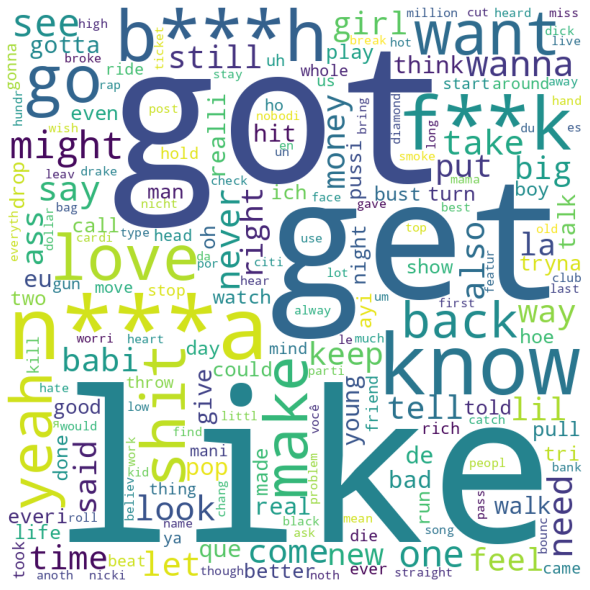

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                min_font_size=10).generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

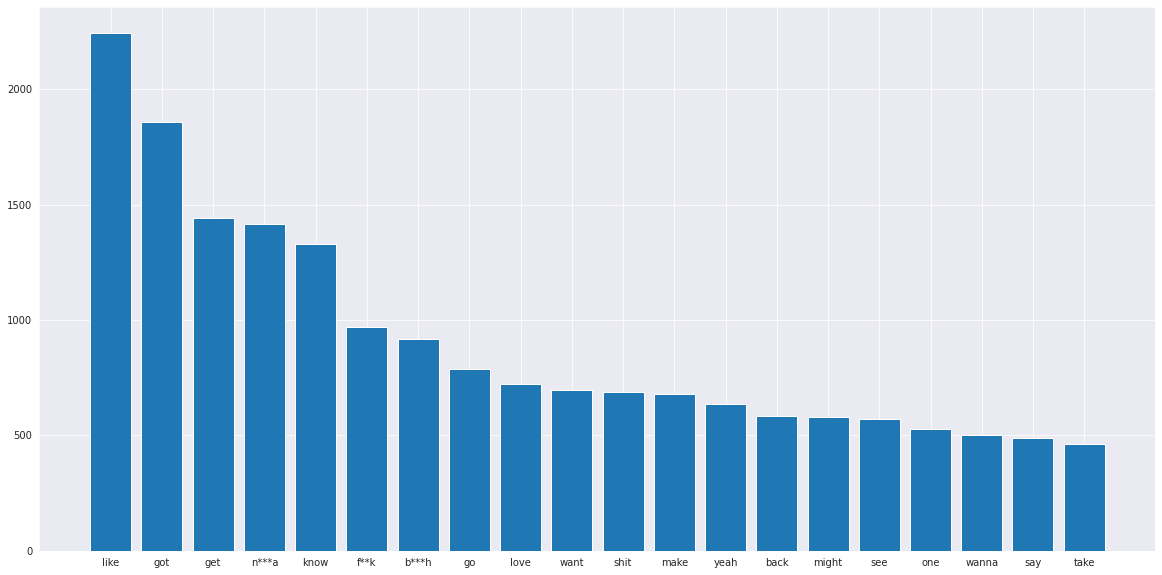

In [8]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
plt.bar(*zip(*word_count.most_common(20)))
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
corpus = []
for index, row in df.iterrows():
      lyrics = row["lyrics"].lower()
      words = lyrics.split() 
      words = [w for w in words if w.isalpha()] 
      words = [w for w in words if w not in stop_words]
      words = [nltk.WordNetLemmatizer().lemmatize(w) for w in words]
      corpus.append(" ".join(words))

In [49]:
tfidf = TfidfVectorizer()

In [52]:
tfidf_matrix = tfidf.fit_transform(corpus)
features = tfidf.get_feature_names_out()

print(features)

['aaaahhhyou' 'aah' 'aalegrapeaches' ... 'zypitano' 'zzzzip' 'zzzzzzz']


In [51]:
for i in range(tfidf_matrix.shape[0]):
    sorted_indices = tfidf_matrix[i].toarray()[0].argsort()[::-1]
    
    print(f"{df['title'][i]}:")
    for j in sorted_indices[:5]:
        print(f"    {features[j]}: {tfidf_matrix[i, j]}")

Thrift Shop:
    badum: 0.34850651099690944
    tagsonly: 0.2178165693730684
    huntin: 0.2178165693730684
    pocketim: 0.2178165693730684
    hella: 0.20481060436875037
Can't Hold Us:
    feat: 0.43377058103086785
    die: 0.15397369973683733
    der: 0.1323176951142521
    ich: 0.12916697887155945
    michael: 0.1267884208433129
Holy Grail:
    rocawear: 0.5049368073064375
    draya: 0.22441635880286112
    jay: 0.21389433108044462
    th: 0.19432246536540687
    holiday: 0.17528941303000978
Started From The Bottom:
    herestarted: 0.6289514064594015
    bottom: 0.5964809044366688
    team: 0.30682462039183434
    whole: 0.19918547891355728
    niggastarted: 0.165513528015632
Feel This Moment:
    christina: 0.42803713949676253
    feel: 0.2839352307997079
    momentchorus: 0.22865891874128597
    wanna: 0.19616472419222905
    moment: 0.17860323491589292
F**kin Problems:
    problemand: 0.42550753240467765
    bad: 0.35491984328012427
    thats: 0.30741752179949206
    ppproblemi